In [1]:
from sqlalchemy import create_engine
from sql_config import password

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#snippet of code was created in class.
dbname = 'Employee_DB'
servername = 'localhost'
username = 'postgres'
port = 5432
conn_string = f'postgres://{username}:{password}@{servername}:{port}/{dbname}'
engine = create_engine(conn_string, echo= False)
conn = engine.connect()

In [72]:
empl_df = pd.read_sql('Select * from salaries', conn)
empl_df.tail()

,emp_no,salary
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000
300023,499999,63707


In [73]:
empl_df.drop_duplicates(subset="emp_no", keep="last")


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [74]:
empl_df["salary"].min()

40000

In [75]:
empl_df["salary"].max()

129492

In [76]:
bins = [39999,59999,79999,99999,119999,130000]

groupname = ["40K-59K","60K-79K","80K-99K","100K-119K","120K-130K"]

In [77]:
empl_df["Salary Range"] = pd.cut(empl_df["salary"],bins, labels = groupname, include_lowest=True)
empl_df.tail()

,emp_no,salary,Salary Range
300019,499995,40000,40K-59K
300020,499996,58058,40K-59K
300021,499997,49597,40K-59K
300022,499998,40000,40K-59K
300023,499999,63707,60K-79K


In [78]:
salary_range = empl_df.loc[:,["salary","Salary Range"]]
salary_range = salary_range.groupby("Salary Range")

count = salary_range["salary"].count()
count

Salary Range
40K-59K      216380
60K-79K       66227
80K-99K       16129
100K-119K      1264
120K-130K        24
Name: salary, dtype: int64

In [87]:
count = list(salary_range["salary"].count())


Text(0.5, 1.0, 'Range of Salary for Employees')

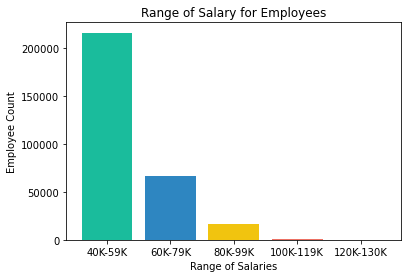

In [95]:
color =['#1ABC9C', '#2E86C1', '#F1C40F','#EC7063', '#C0392B']
plt.bar(groupname, count, color= color)
plt.xlabel("Range of Salaries")
plt.ylabel("Employee Count")
plt.title("Range of Salary for Employees")

for index, value in enumerate(count):
    plt.text(value)
